# Bank Customer Churn 

## Get  Data 

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
from matplotlib.gridspec import GridSpec
warnings.filterwarnings("ignore")

In [2]:
data_folder = Path("/Users/weiyiwang/code/TheWangAndOnly/BankCustomerChurn/Data")

file_to_open = data_folder / "ChurnModeling.csv"

f = open(file_to_open)

df = pd.read_csv(f)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Some Viz

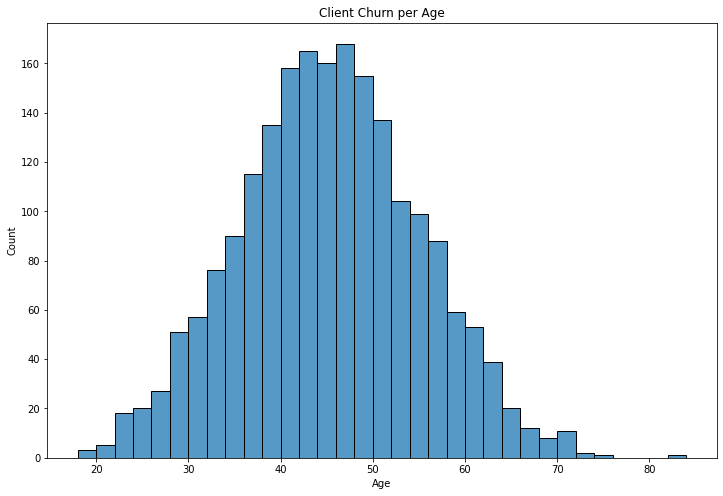

In [4]:
exited = df[df['Exited']==1]

plt.figure(figsize=(12,8))
plt.title('Client Churn per Age')
sns.histplot(x='Age', data=exited)

plt.show()

In [5]:
def age_transformer(X):
    # 18-30
    if X>18 and X<=30:
        return '18-30'
    
    # 30-40
    elif X>30 and X<=40:
        return '30-40'
    
    # 40-50
    elif X>40 and X<=50:
        return '40-50'
    
    # 50-65
    elif X>50 and X<=60:
        return '50-65'
        
    else:
        return '65>'
    
#df['Age'] = df['Age'].apply(age_transformer)

Text(0, 0.5, 'Num of Exited Clients')

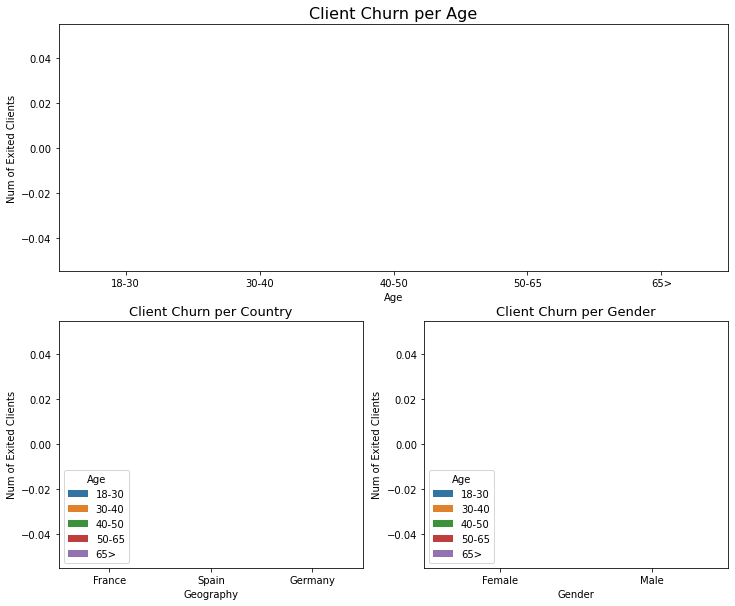

In [6]:
exited = df[df['Exited']==1]

fig = plt.figure(figsize=(12,10))
spec2 = GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0:])
ax2 = fig.add_subplot(spec2[1, 0])
ax3 = fig.add_subplot(spec2[1, 1])

### Per Age

ax1.set_title('Client Churn per Age', size=16)
sns.countplot(x='Age', order=['18-30','30-40','40-50','50-65','65>'], data=exited, ax=ax1)
ax1.set_ylabel('Num of Exited Clients')

### Per Country

ax2.set_title('Client Churn per Country', size=13)
sns.countplot(x='Geography', hue='Age', hue_order=['18-30','30-40','40-50','50-65','65>'], data=exited, ax=ax2)
ax2.set_ylabel('Num of Exited Clients')

### Per Gender

ax3.set_title('Client Churn per Gender', size=13)
sns.countplot(x='Gender', hue='Age', hue_order=['18-30','30-40','40-50','50-65','65>'], data=exited, ax=ax3)
ax3.set_ylabel('Num of Exited Clients')


#plt.show()

## Preprocessing Data

### Encoding Objects (Geography & Gender)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
scaler = RobustScaler()
log_reg = LogisticRegression(max_iter = 1000)
label = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [8]:
ohe.fit(df[['Gender']])
gender_encoded = ohe.transform(df[['Gender']])
df['Female'], df['Male'] = gender_encoded.T

In [9]:
ohe.fit(df[['Geography']])
geography_encoded = ohe.transform(df[['Geography']])
df["France"],df["Germany"],df['Spain'] = geography_encoded.T

In [10]:
df = df.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname', 'Gender'], axis = 1)

In [11]:
df.corr()['Exited'].drop('Exited')

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Female             0.106512
Male              -0.106512
France            -0.104955
Germany            0.173488
Spain             -0.052667
Name: Exited, dtype: float64

## Defining dependent & independent variable

In [12]:
y = df['Exited']
X = df.drop('Exited', axis = 1)

In [13]:
X.shape

(10000, 13)

<AxesSubplot:>

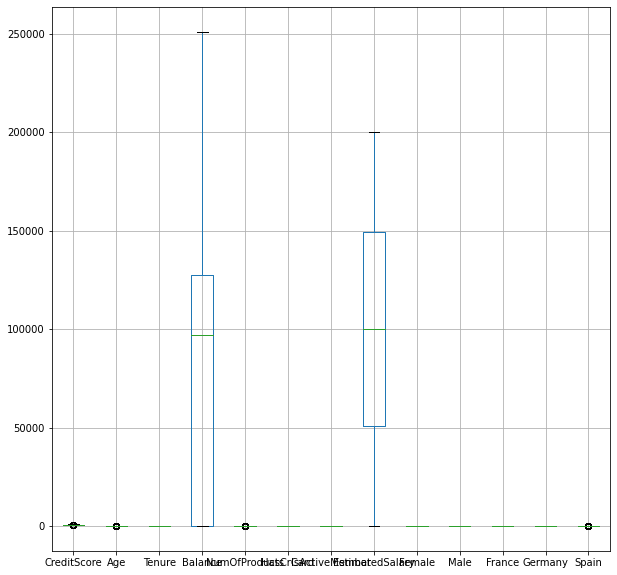

In [14]:
plt.figure(figsize=(10,10))
X.boxplot()

### Split data in train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

### Logistic Regression

In [17]:
model = log_reg.fit(X_train_scaled,y_train)

In [18]:
# Baseline Score
1 - df['Exited'].sum()/len(df['Exited'])

0.7963

In [19]:
# Logistic performance
scores = cross_val_score(log_reg, X_train_scaled, y_train, cv =10)
scores.mean()

0.8088749999999999

In [20]:
log_reg.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

### Other models (see Biagio)

## Neural Network

In [33]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
def init():

    model = Sequential()
    model.add(layers.Dense(256, input_dim = X.shape[1], activation = 'relu'))
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
    
    return model

In [35]:
X.shape

(10000, 13)

In [36]:
es = EarlyStopping(patience = 5)
model = init()
model.fit(X_train_scaled, y_train, epochs=25, validation_split = 0.05)

Epoch 1/25
238/238 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.7949 - val_loss: 0.1318 - val_accuracy: 0.8100
Epoch 2/25
238/238 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.8498 - val_loss: 0.1121 - val_accuracy: 0.8425
Epoch 3/25
238/238 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.8558 - val_loss: 0.1087 - val_accuracy: 0.8525
Epoch 4/25
238/238 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.8631 - val_loss: 0.1100 - val_accuracy: 0.8425
Epoch 5/25
238/238 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.8673 - val_loss: 0.1083 - val_accuracy: 0.8450
Epoch 6/25
238/238 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.8712 - val_loss: 0.1069 - val_accuracy: 0.8500
Epoch 7/25
238/238 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.8653 - val_loss: 0.1062 - val_accuracy: 0.8500
Epoch 

In [44]:
y_pred = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:\n",mean_absolute_error(y_test,y_pred))

Mean Squared Error:
 0.3048987145107236
Mean Absolute Error:
 0.4016791580319405


In [46]:
accuracy_score(y_test,y_pred)

0.642

In [41]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.6420


[0.3048986792564392, 0.6420000195503235]